# Partie Text Mining et Viz

In [53]:
import pandas as pd
import numpy as np
from unidecode import unidecode
import re
from nltk.stem import SnowballStemmer
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Srappé le texte d'une page via son code html 

In [55]:
# Étape 1 : Envoyer une requête à la page web
lien = "https://www.insee.fr/fr/statistiques/8286380#graphique-figure1_radio3"  # Remplacez par l'URL cible
response = requests.get(lien)

# Vérification de la réponse
if response.status_code == 200:
    # Étape 2 : Parser le contenu HTML avec BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Étape 3 : Extraire et nettoyer les paragraphes
    paragraphs = [
        p.text.replace('\n', ' ').replace('\xa0', ' ').strip() for p in soup.find_all('p')
    ]

    # Afficher les paragraphes nettoyés
    print(paragraphs)
else:
    print(f"Erreur : impossible de charger la page (statut {response.status_code})")

['Philippe Bertrand (Insee)', 'Les prix immobiliers sont plus élevés en moyenne quand la densité de population augmente,                reflétant ainsi des tensions locales sur le marché immobilier. En France métropolitaine,                ils sont les plus bas dans les territoires ruraux, et les plus hauts dans les pôles                des grandes agglomérations. Le tourisme est un autre facteur de tensions locales qui                tire les prix vers le haut.', 'Une maison sur dix est vendue à moins de 850 euros le m², une sur dix l’est à plus                de 4 360 euros le m². Un appartement sur dix est vendu à moins de 1 350 euros et un                sur dix à plus de 8 240 euros le m². Sur dix ans, ces écarts entre prix hauts et prix                bas se sont accrus.', 'Dans les aires d’attraction des villes de grande taille, les logements anciens sont                mieux valorisés dans les pôles que dans les couronnes. Dans les aires de moins de                50 000 habita

## Nettoyage des espaces superflues 

In [57]:
# Fonction pour remplacer les espaces multiples par un seul espace
def clean_spaces(text):
    # Remplace toutes les occurrences de plusieurs espaces par un seul espace
    return re.sub(r'\s+', ' ', text).strip()

# Appliquer la fonction de nettoyage sur chaque paragraphe
cleaned_paragraphs = [clean_spaces(p) for p in paragraphs]

# Afficher les paragraphes nettoyés
print(cleaned_paragraphs)

['Philippe Bertrand (Insee)', 'Les prix immobiliers sont plus élevés en moyenne quand la densité de population augmente, reflétant ainsi des tensions locales sur le marché immobilier. En France métropolitaine, ils sont les plus bas dans les territoires ruraux, et les plus hauts dans les pôles des grandes agglomérations. Le tourisme est un autre facteur de tensions locales qui tire les prix vers le haut.', 'Une maison sur dix est vendue à moins de 850 euros le m², une sur dix l’est à plus de 4 360 euros le m². Un appartement sur dix est vendu à moins de 1 350 euros et un sur dix à plus de 8 240 euros le m². Sur dix ans, ces écarts entre prix hauts et prix bas se sont accrus.', 'Dans les aires d’attraction des villes de grande taille, les logements anciens sont mieux valorisés dans les pôles que dans les couronnes. Dans les aires de moins de 50 000 habitants, les biens immobiliers les plus centraux ne sont pas les plus chers.', 'Depuis 2000, en France métropolitaine, les prix immobiliers

In [58]:
# On vérifié que chaque paragraphes est bien de type str
i = 1

for doc in corpus:
    if type(doc) == str:
        print(f"Le type du paragraphe {i} est {type(doc)}, c'est ok!" )
    else :
        print(f"Le type du paragraphe {i} est {type(doc)}, il faut le convertir!" )
        
    i+=1

Le type du paragraphe 1 est <class 'str'>, c'est ok!
Le type du paragraphe 2 est <class 'str'>, c'est ok!
Le type du paragraphe 3 est <class 'str'>, c'est ok!
Le type du paragraphe 4 est <class 'str'>, c'est ok!
Le type du paragraphe 5 est <class 'str'>, c'est ok!
Le type du paragraphe 6 est <class 'str'>, c'est ok!
Le type du paragraphe 7 est <class 'str'>, c'est ok!
Le type du paragraphe 8 est <class 'str'>, c'est ok!
Le type du paragraphe 9 est <class 'str'>, c'est ok!
Le type du paragraphe 10 est <class 'str'>, c'est ok!
Le type du paragraphe 11 est <class 'str'>, c'est ok!
Le type du paragraphe 12 est <class 'str'>, c'est ok!
Le type du paragraphe 13 est <class 'str'>, c'est ok!
Le type du paragraphe 14 est <class 'str'>, c'est ok!
Le type du paragraphe 15 est <class 'str'>, c'est ok!
Le type du paragraphe 16 est <class 'str'>, c'est ok!
Le type du paragraphe 17 est <class 'str'>, c'est ok!
Le type du paragraphe 18 est <class 'str'>, c'est ok!
Le type du paragraphe 19 est <class '

In [59]:
# Passage du corpus en minuscule
corpus = [] # initialisation de la liste

for doc in cleaned_paragraphs:
    corpus.append(doc.lower()) 
    
corpus

['philippe bertrand (insee)',
 'les prix immobiliers sont plus élevés en moyenne quand la densité de population augmente, reflétant ainsi des tensions locales sur le marché immobilier. en france métropolitaine, ils sont les plus bas dans les territoires ruraux, et les plus hauts dans les pôles des grandes agglomérations. le tourisme est un autre facteur de tensions locales qui tire les prix vers le haut.',
 'une maison sur dix est vendue à moins de 850 euros le m², une sur dix l’est à plus de 4 360 euros le m². un appartement sur dix est vendu à moins de 1 350 euros et un sur dix à plus de 8 240 euros le m². sur dix ans, ces écarts entre prix hauts et prix bas se sont accrus.',
 'dans les aires d’attraction des villes de grande taille, les logements anciens sont mieux valorisés dans les pôles que dans les couronnes. dans les aires de moins de 50 000 habitants, les biens immobiliers les plus centraux ne sont pas les plus chers.',
 'depuis 2000, en france métropolitaine, les prix immobil

In [60]:
# Suppréssion des accents
corpus = [unidecode(doc) for doc in corpus]

corpus

['philippe bertrand (insee)',
 'les prix immobiliers sont plus eleves en moyenne quand la densite de population augmente, refletant ainsi des tensions locales sur le marche immobilier. en france metropolitaine, ils sont les plus bas dans les territoires ruraux, et les plus hauts dans les poles des grandes agglomerations. le tourisme est un autre facteur de tensions locales qui tire les prix vers le haut.',
 "une maison sur dix est vendue a moins de 850 euros le m2, une sur dix l'est a plus de 4 360 euros le m2. un appartement sur dix est vendu a moins de 1 350 euros et un sur dix a plus de 8 240 euros le m2. sur dix ans, ces ecarts entre prix hauts et prix bas se sont accrus.",
 "dans les aires d'attraction des villes de grande taille, les logements anciens sont mieux valorises dans les poles que dans les couronnes. dans les aires de moins de 50 000 habitants, les biens immobiliers les plus centraux ne sont pas les plus chers.",
 "depuis 2000, en france metropolitaine, les prix immobil

In [61]:
# Transformez toutes les suites de 4 chiffres (de 0 à 9) en "annee"

corpus = [re.sub(r'\b[0-9]{4}\b', 'annee', doc) for doc in corpus]

corpus

['philippe bertrand (insee)',
 'les prix immobiliers sont plus eleves en moyenne quand la densite de population augmente, refletant ainsi des tensions locales sur le marche immobilier. en france metropolitaine, ils sont les plus bas dans les territoires ruraux, et les plus hauts dans les poles des grandes agglomerations. le tourisme est un autre facteur de tensions locales qui tire les prix vers le haut.',
 "une maison sur dix est vendue a moins de 850 euros le m2, une sur dix l'est a plus de 4 360 euros le m2. un appartement sur dix est vendu a moins de 1 350 euros et un sur dix a plus de 8 240 euros le m2. sur dix ans, ces ecarts entre prix hauts et prix bas se sont accrus.",
 "dans les aires d'attraction des villes de grande taille, les logements anciens sont mieux valorises dans les poles que dans les couronnes. dans les aires de moins de 50 000 habitants, les biens immobiliers les plus centraux ne sont pas les plus chers.",
 "depuis annee, en france metropolitaine, les prix immobi

In [62]:
# Remplacement d'un espace de tout ce qui est différents d'une lettre minuscule. 
corpus = [re.sub(r"[^a-z]+", ' ', doc) for doc in corpus]

corpus

['philippe bertrand insee ',
 'les prix immobiliers sont plus eleves en moyenne quand la densite de population augmente refletant ainsi des tensions locales sur le marche immobilier en france metropolitaine ils sont les plus bas dans les territoires ruraux et les plus hauts dans les poles des grandes agglomerations le tourisme est un autre facteur de tensions locales qui tire les prix vers le haut ',
 'une maison sur dix est vendue a moins de euros le m une sur dix l est a plus de euros le m un appartement sur dix est vendu a moins de euros et un sur dix a plus de euros le m sur dix ans ces ecarts entre prix hauts et prix bas se sont accrus ',
 'dans les aires d attraction des villes de grande taille les logements anciens sont mieux valorises dans les poles que dans les couronnes dans les aires de moins de habitants les biens immobiliers les plus centraux ne sont pas les plus chers ',
 'depuis annee en france metropolitaine les prix immobiliers des logements anciens ont ete multiplies 

In [63]:
# Définition de la liste de stop words considérés (celle de spacy)
stopWords = ['a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 
             'allô', 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 
             'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'auraient', 'aurait', 'auront', 'aussi', 
             'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 
             'avant', 'avec', 'avoir', 'avons', 'ayant', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'boum', 
             'bravo', 'brrr', "c'", 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 
             'celui', 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 
             'cet', 'cette', 'ceux', 'ceux-ci', 'ceux-là', 'chacun', 'chacune', 'chaque', 'cher', 'chers', 'chez', 'chiche', 'chut', 
             'chère', 'chères', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième', 'clac', 'clic', 'combien', 
             'comme', 'comment', 'comparable', 'comparables', 'compris', 'concernant', 'contre', 'couic', 'crac', 'c’', "d'", 'da', 
             'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis', 'dernier', 'derniere', 'derriere', 'derrière', 
             'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant', 'devers', 
             'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire', 
             'directe', 'directement', 'dit', 'dite', 'dits', 'divers', 'diverse', 'diverses', 'dix', 'dix-huit', 'dix-neuf', 
             'dix-sept', 'dixième', 'doit', 'doivent', 'donc', 'dont', 'douze', 'douzième', 'dring', 'du', 'duquel', 'durant', 'dès', 
             'désormais', 'd’', 'effet', 'egale', 'egalement', 'egales', 'eh', 'elle', 'elle-même', 'elles', 'elles-mêmes', 'en', 
             'encore', 'enfin', 'entre', 'envers', 'environ', 'es', 'est', 'et', 'etaient', 'etais', 'etait', 'etant', 'etc', 'etre', 
             'eu', 'euh', 'eux', 'eux-mêmes', 'exactement', 'excepté', 'extenso', 'exterieur', 'fais', 'faisaient', 'faisant', 'fait', 
             'façon', 'feront', 'fi', 'flac', 'floc', 'font', 'gens', 'ha', 'hein', 'hem', 'hep', 'hi', 'ho', 'holà', 'hop', 'hormis', 
             'hors', 'hou', 'houp', 'hue', 'hui', 'huit', 'huitième', 'hum', 'hurrah', 'hé', 'hélas', 'i', 'il', 'ils', 'importe', 
             "j'", 'je', 'jusqu', 'jusque', 'juste', 'j’', "l'", 'la', 'laisser', 'laquelle', 'las', 'le', 'lequel', 'les', 
             'lesquelles', 'lesquels', 'leur', 'leurs', 'longtemps', 'lors', 'lorsque', 'lui', 'lui-meme', 'lui-même', 'là', 'lès', 'l’', 
             "m'", 'ma', 'maint', 'maintenant', 'mais', 'malgre', 'malgré', 'maximale', 'me', 'meme', 'memes', 'merci', 'mes', 'mien', 'mienne', 
             'miennes', 'miens', 'mille', 'mince', 'minimale', 'moi', 'moi-meme', 'moi-même', 'moindres', 'moins', 'mon', 
             'moyennant', 'même', 'mêmes', 'm’', "n'", 'na', 'naturel', 'naturelle', 'naturelles', 'ne', 'neanmoins', 'necessaire', 
             'necessairement', 'neuf', 'neuvième', 'ni', 'nombreuses', 'nombreux', 'non', 'nos', 'notamment', 'notre', 'nous', 'nous-mêmes', 
             'nouveau', 'nul', 'néanmoins', 'nôtre', 'nôtres', 'n’', 'o', 'oh', 'ohé', 'ollé', 'olé', 'on', 'ont', 'onze', 'onzième', 'ore', 
             'ou', 'ouf', 'ouias', 'oust', 'ouste', 'outre', 'ouvert', 'ouverte', 'ouverts', 'où', 'paf', 'pan', 'par', 'parce', 'parfois', 
             'parle', 'parlent', 'parler', 'parmi', 'parseme', 'partant', 'particulier', 'particulière', 'particulièrement', 'pas', 'passé', 
             'pendant', 'pense', 'permet', 'personne', 'peu', 'peut', 'peuvent', 'peux', 'pff', 'pfft', 'pfut', 'pif', 'pire', 'plein', 'plouf', 
             'plus', 'plusieurs', 'plutôt', 'possessif', 'possessifs', 'possible', 'possibles', 'pouah', 'pour', 'pourquoi', 'pourrais', 'pourrait', 
             'pouvait', 'prealable', 'precisement', 'premier', 'première', 'premièrement', 'pres', 'probable', 'probante', 'procedant', 'proche', 
             'près', 'psitt', 'pu', 'puis', 'puisque', 'pur', 'pure', "qu'", 'quand', 'quant', 'quant-à-soi', 'quanta', 'quarante', 'quatorze', 
             'quatre', 'quatre-vingt', 'quatrième', 'quatrièmement', 'que', 'quel', 'quelconque', 'quelle', 'quelles', "quelqu'un", 'quelque', 
             'quelques', 'quels', 'qui', 'quiconque', 'quinze', 'quoi', 'quoique', 'qu’', 'rare', 'rarement', 'rares', 'relative', 'relativement', 
             'remarquable', 'rend', 'rendre', 'restant', 'reste', 'restent', 'restrictif', 'retour', 'revoici', 'revoilà', 'rien', "s'", 'sa', 
             'sacrebleu', 'sait', 'sans', 'sapristi', 'sauf', 'se', 'sein', 'seize', 'selon', 'semblable', 'semblaient', 'semble', 'semblent', 
             'sent', 'sept', 'septième', 'sera', 'seraient', 'serait', 'seront', 'ses', 'seul', 'seule', 'seulement', 'si', 'sien', 'sienne', 
             'siennes', 'siens', 'sinon', 'six', 'sixième', 'soi', 'soi-même', 'soit', 'soixante', 'son', 'sont', 'sous', 'souvent', 'specifique', 
             'specifiques', 'speculatif', 'stop', 'strictement', 'subtiles', 'suffisant', 'suffisante', 'suffit', 'suis', 'suit', 'suivant', 
             'suivante', 'suivantes', 'suivants', 'suivre', 'superpose', 'sur', 'surtout', 's’', "t'", 'ta', 'tac', 'tant', 'tardive', 'te', 
             'tel', 'telle', 'tellement', 'telles', 'tels', 'tenant', 'tend', 'tenir', 'tente', 'tes', 'tic', 'tien', 'tienne', 'tiennes', 
             'tiens', 'toc', 'toi', 'toi-même', 'ton', 'touchant', 'toujours', 'tous', 'tout', 'toute', 'toutefois', 'toutes', 'treize', 'trente', 
             'tres', 'trois', 'troisième', 'troisièmement', 'trop', 'très', 'tsoin', 'tsouin', 'tu', 'té', 't’', 'un', 'une', 'unes', 
             'uniformement', 'unique', 'uniques', 'uns', 'va', 'vais', 'vas', 'vers', 'via', 'vif', 'vifs', 'vingt', 'vivat', 'vive', 'vives', 
             'vlan', 'voici', 'voilà', 'vont', 'vos', 'votre', 'vous', 'vous-mêmes', 'vu', 'vé', 'vôtre', 'vôtres', 'zut', 'à', 'â', 'ça', 'ès', 
             'étaient', 'étais', 'était', 'étant', 'été', 'être', 'ô', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
             'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'qu']

stopWords = [unidecode(sw) for sw in stopWords]

In [64]:
corpus = [' '.join([word for word in doc.split() if word not in stopWords]) for doc in corpus]

corpus

['philippe bertrand insee',
 'prix immobiliers eleves moyenne densite population augmente refletant tensions locales marche immobilier france metropolitaine territoires ruraux hauts poles grandes agglomerations tourisme facteur tensions locales tire prix haut',
 'maison vendue euros euros appartement vendu euros euros ans ecarts prix hauts prix accrus',
 'aires attraction villes grande taille logements anciens mieux valorises poles couronnes aires habitants biens immobiliers centraux',
 'annee france metropolitaine prix immobiliers logements anciens multiplies hausse prix complique acces propriete menages primo accedants accompagne forte concentration patrimoine immobilier menages residant france metropolitaine proprietaires residence principale legere baisse annee menage proprietaire logements niveau prix logements vendus annee annee heterogene territoire resulte confrontation offre demande niveau local sources part achats residences principales secondaires biens destines investisseme

## Visualisation 

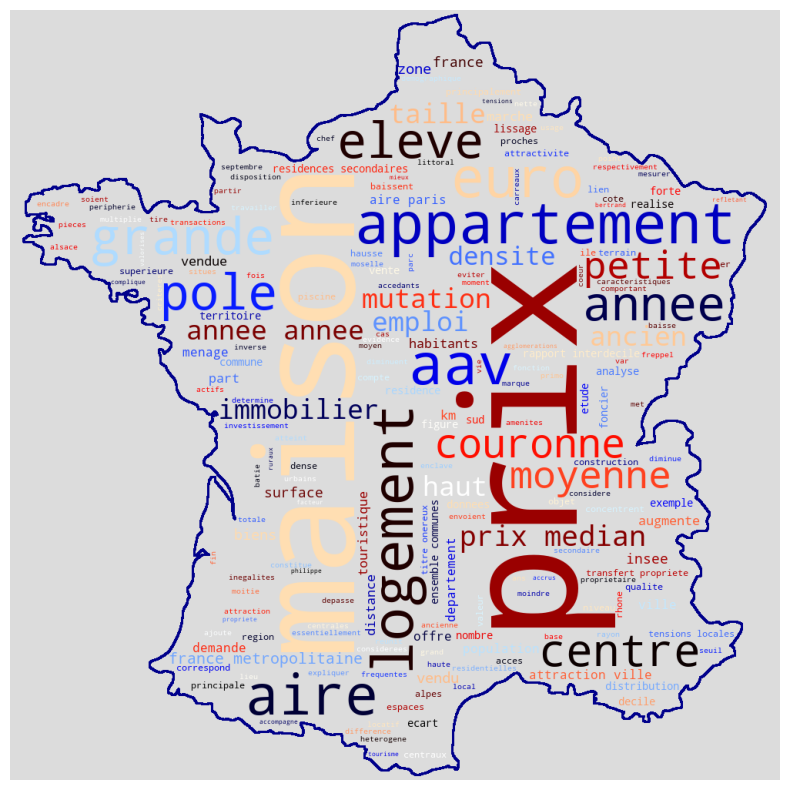

In [157]:
from wordcloud import WordCloud
from PIL import Image


texte = ' '.join(corpus)

#Récupération du mask
mask = np.array(Image.open("france.png"))
wordcloud = WordCloud(width=400, height=400, background_color='gainsboro', mask=mask, contour_width=4, contour_color='darkblue', colormap = 'flag').generate(texte)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()